In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
/Users/geoff/PycharmProjects/Tibame_Online_Course/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/geoff/PycharmProjects/Tibame_Online_Course/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/geoff/PycharmProjects/Tibame_Online_Course/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint1

In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

狗


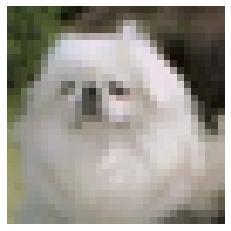

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

c = random.randint(0, 49999)
plt.axis("off")
# trans[0] -> 飛機
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [6]:
# 資料預處理
# 1. 題目預處理(Normalize)
# 卷積不需要攤開，直接進去
x_train_shape = x_train / 255  # 28*28=784
x_test_shape = x_test / 255
# Demo
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [7]:
# 2. 答案預處理(One-hot encoding)
# 與上次一樣

from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Demo
print("原來：", y_train[1])
print("後來：", y_train_cat[1])

原來： [9]
後來： [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from keras.models import Sequential
# MLP
from keras.layers import Dense, Flatten
# Conv
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
# (一個過濾器) 3 * 3 * (RGB) 3 * (filter數目) 32 + (bias) 32 = 896
cnn.add(Conv2D(32, (3, 3), 
               input_shape=(32, 32, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (一個過濾器) 3 * 3 * (特徵數) 32 * (filter數目) 64 + (bias) 64 = 18496
cnn.add(Conv2D(64, (3, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, (3, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)            

In [9]:
# 確定模型訓練方式......等
# 隨機（隨便選一組weights）梯度（正確方向）下降
# loss: 最後輸出一個：binary_crossentropy, 最後輸出多個機率：categorical_cross_entropy
# optimizer：下降的時候優化 -> 基於動量（在走的時候不是等速度，而是有速度的累積）
cnn.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
            optimizer="adam")

In [10]:
# batch: 看幾筆(200)做一次梯度下降（修正）
# epochs: 整份考古題看幾次(10)
# 10個epoch, 200batch: 50000 * 10 / 200 -> 2500(次)方向修正
cnn.fit(x_train_shape,
        y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split=0.1,) # verbose=2: 去掉進度條


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 85s 2ms/step - loss: 1.6069 - accuracy: 0.4129 - val_loss: 1.3554 - val_accuracy: 0.5240
Epoch 2/10
45000/45000 [==============================] - 86s 2ms/step - loss: 1.2182 - accuracy: 0.5696 - val_loss: 1.0536 - val_accuracy: 0.6310
Epoch 3/10
45000/45000 [==============================] - 99s 2ms/step - loss: 1.0238 - accuracy: 0.6397 - val_loss: 0.9728 - val_accuracy: 0.6564
Epoch 4/10
45000/45000 [==============================] - 95s 2ms/step - loss: 0.9063 - accuracy: 0.6822 - val_loss: 0.9207 - val_accuracy: 0.6868
Epoch 5/10
45000/45000 [==============================] - 80s 2ms/step - loss: 0.8181 - accuracy: 0.7161 - val_loss: 0.8430 - val_accuracy: 0.7114
Epoch 6/10
45000/45000 [==============================] - 78s 2ms/step - loss: 0.7485 - accuracy: 0.7392 - val_loss: 0.8449 - val_accuracy: 0.7124
Epoch 7/10
45000/45000 [==============================] - 83s 2ms/st

In [11]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 7s 734us/step


[0.8351615455150604, 0.7264000177383423]

In [12]:
import pandas as pd
# predict: 機率, predict_classes: 分類
# trans = ["飛機", "汽車", "鳥", "貓", "鹿",
#          "狗", "青蛙", "馬", "船", "卡車"]
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,794,14,41,17,20,5,12,4,55,38
1,23,835,5,9,1,1,10,1,22,93
2,59,6,644,56,60,37,81,29,13,15
3,26,12,83,582,60,70,90,30,25,22
4,28,1,101,61,623,18,97,54,12,5
5,15,7,60,234,39,513,51,50,18,13
6,5,3,39,53,15,13,855,6,7,4
7,25,5,39,36,61,34,13,772,2,13
8,79,27,18,7,6,2,10,2,815,34
9,34,57,18,17,3,5,10,8,17,831


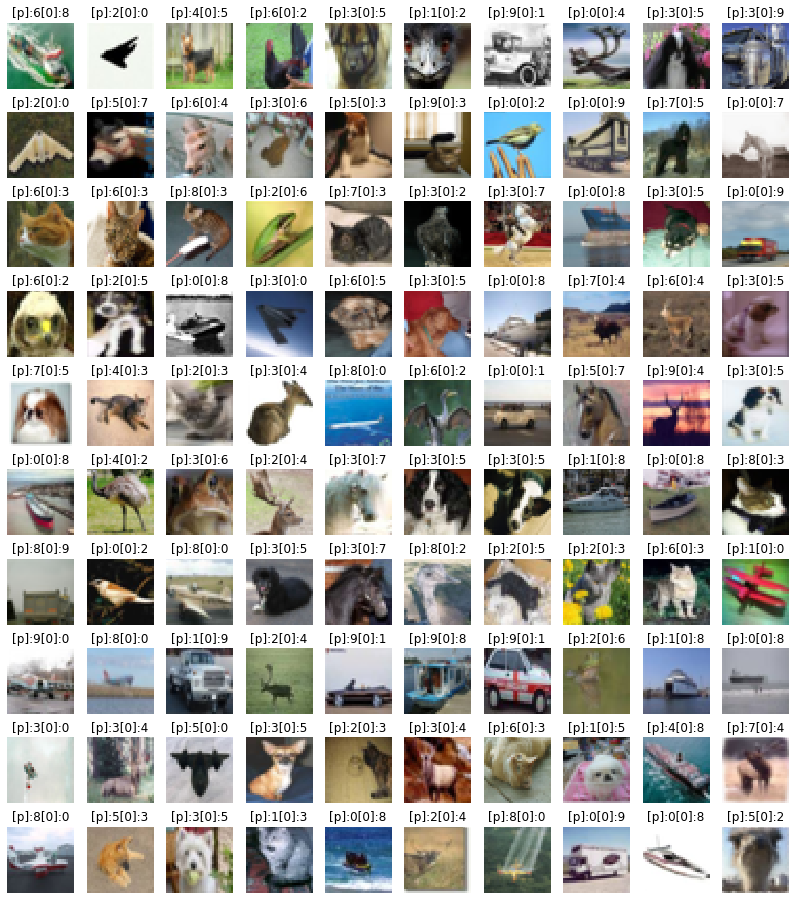

In [13]:
# numpy才能這樣直接每個數字比較
import numpy as np
# list: list(一個數字)
# numpy array: nparray([多個數字])
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0] # 為預測錯誤的位置
# 預測錯誤的圖的原本標籤
oriflase = y_dim[diff]
# 預測錯誤的圖的預測標籤
preflase = pre[diff]
# 把圖拿出來
imgflase = x_test[diff]
# 整張圖片的寬高
plt.figure(figsize=(14, 450))
# 我們每一個列就是10個
width = 10
height = int(len(imgflase) / 10) + 1
for (i, img) in enumerate(imgflase[0:100]):
    # (列數, 行數, 第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    plt.axis("off") # 關閉座標軸
    t = "[p]:" + str(preflase[i]) + "[0]:" +str(oriflase[i])
    plt.title(t)
    plt.imshow(img)
# trans = ["飛機", "汽車", "鳥", "貓", "鹿",
#          "狗", "青蛙", "馬", "船", "卡車"]